# Regressione lineare (parte 1 - max 1.5 punti)
Nella carriera di un ingegnere matematico la regressione lineare è uno strumento di straordinaria importanza, ma è veramente necessario vederla in 10 corsi diversi? E ogni volta dall'inizio?

Se non ne puoi più, salta questo assignment. 

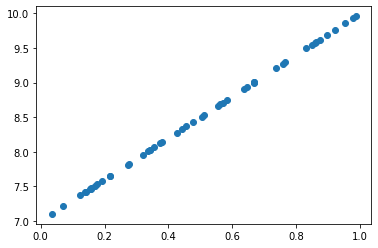

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Generazione dei dati 
n = 50                 # numero di punti analizzati
X = np.random.rand(n)

true_beta = [7, 3]     # [intercetta, coef. angolare]

y_true = true_beta[0] + true_beta[1] * X

plt.scatter(X, y_true)
plt.show()

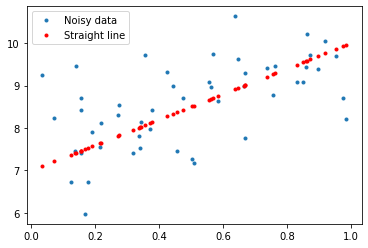

In [3]:
y = y_true + np.random.randn(n)     # aggiungo un errore gaussiano standard
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.legend()
plt.show()

### Regressione lineare via least squares estimation

Considera come riferimento https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods

Calcola i parametri $\beta$ della regressione e plotta il risultato ottenuto

$\hat{\beta} = (X^T X)^{-1} X^T Y$

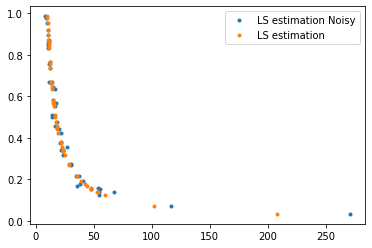

In [4]:
beta_bar=(np.transpose(X)*X)**(-1)*np.transpose(X)*y
plt.plot(beta_bar, X, '.', label = "LS estimation Noisy")
plt.legend()

beta_bar=(np.transpose(X)*X)**(-1)*np.transpose(X)*y_true
plt.plot(beta_bar, X, '.', label = "LS estimation")
plt.legend()

In [5]:
beta_bar

array([ 10.09739882,  11.01472928,  16.73234223,  28.75084741,
        23.7765239 ,  35.26486467,  28.31854865,  23.38940307,
        11.11915264,  47.67144059,  52.68512236,  12.24604719,
        12.5066727 ,  22.68154741,  23.52226126,  13.49785239,
        35.24311103,  15.46822867,  59.37034063,  24.8930286 ,
        10.34357755,  53.9621691 ,  15.29335967,  10.17459019,
        16.90635292,  13.48431223, 207.72925746,  18.34685987,
        47.91458961,  17.7043697 ,  44.24867071,  10.81024813,
        21.74696579,  21.43595031,  11.15549891,  13.83488928,
        14.99735994,  13.47355385,  42.37171291,  11.24258622,
        18.8237655 ,  11.41884768,  12.16325458,  10.61125223,
       102.18747447,  47.82426493,  13.99083592,  15.59682261,
        39.47187478,  19.44520525])

### Regressione lineare via sklearn

Trova in sklearn ciò che fa al caso nostro e plotta il risultato ottenuto

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [8]:
X=X.reshape(-1, 1)
model= LinearRegression()
model.fit(X, y)
model.score(X,y) #R quadro

0.31381721605441737

In [9]:
ypred = model.predict(X)
print(ypred)

[9.56373425 9.33755272 8.60893341 8.13224597 8.2626494  8.02228288
 8.14154576 8.27546647 9.31504573 7.9015539  7.86987138 9.10450512
 9.06291869 8.3002065  8.27101321 8.92362136 8.02257617 8.71248485
 7.83639349 8.22822224 9.49748774 7.86279759 8.72848621 9.54247286
 8.59615322 8.92534681 7.65609069 8.50148548 7.8998542  8.54141738
 7.92760687 9.38336891 8.33573251 8.34835383 9.30734701 8.88206171
 8.75663465 8.92672096 7.94381675 9.28917679 8.47394177 9.25355132
 9.11821095 9.43031967 7.72898726 7.90048345 8.86369462 8.70100135
 7.9721405  8.4404476 ]


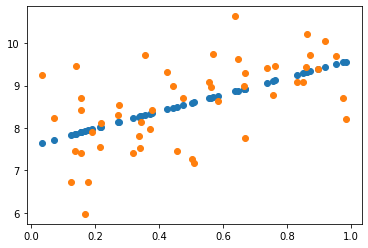

In [10]:
plt.scatter(X,ypred)
plt.scatter(X,y)

### Regressione con batch gradient descent

Implementa la regressione tramite batch gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [11]:
def lr_gradient_descent(X, y):
    
    XX=X.reshape(50, 1)
    alpha=0.01
    iterations=1000
    weights= np.zeros(1)
    m = len(y)
    fcost=[]

    for i in range(iterations):
        ypred = np.dot(XX,weights)
        loss = ypred-y
        gradient = XX.T.dot(loss)/m
        weights = weights - alpha*gradient
        cost= np.sum((XX.dot(weights)-y)**2)/2/m
        fcost.append(cost)

    return weights, fcost

    
    

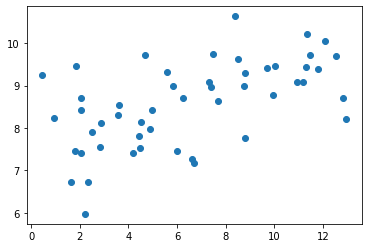

In [12]:
w,c=lr_gradient_descent(X,y)
XX=X.reshape(50,1)
plt.scatter(np.dot(XX,w), y)




In [15]:
w

array([13.13798568])

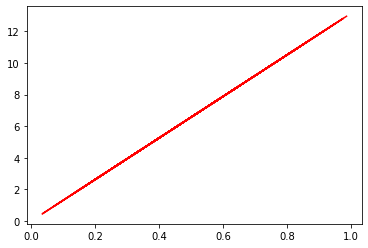

In [13]:
plt.plot(X, np.dot(XX,w), color='red')

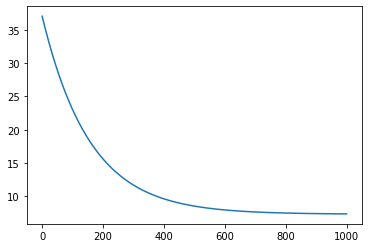

In [14]:
plt.plot(c)

### Regressione con stochastic gradient descent

Implementa la regressione tramite stochastic gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [ ]:
def lr_stochasticgd(X,y,k,divideby):
    
    weights=np.zeros(1)
    iterations=1000
    alpha=0.01
    fcost=[]
    m=len(y)
    
    
    for i in range(iterations):
        cost=0
        for i in range(m):
            randsplit = np.random.randint(0,m)
            XX = X[randsplit,:].reshape(1,X.shape[1])
            yy = y[rand_ind].reshape(1,1)
            ypred = np.dot(XX,weights)
            loss = ypred-yy
            gradient = XX.T.dot(loss)/m
            weights = weights - alpha*gradient
            cost=cost+np.sum((XX.dot(weights)-y)**2)/2/m
        fcost.append(cost)
    return weights, fcost 


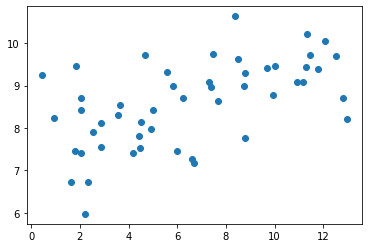

In [ ]:
w,c=lr_gradient_descent(X,y)
XX=X.reshape(50,1)
plt.scatter(np.dot(XX,w), y)

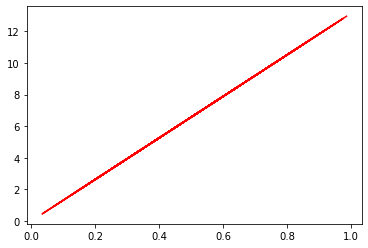

In [ ]:
plt.plot(X, np.dot(XX,w), color='red')

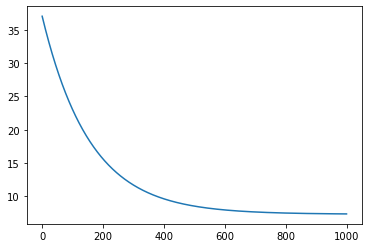

In [ ]:
plt.plot(c)

# Regressione lineare (parte 2 - max 1.5 punti)


Implementa una classe MyLinearRegression che abbia i seguenti metodi:
    - fit(X,y)
    - predict(X_test)
    - show_info
    
Un primissimo scheletro è proposto qui, ma è consigliabile (per maggiore chiarezza) aggiungere ulteriori metodi all'interno della classe.

In [16]:
# Non sono convinto

class MyLinearRegression:

    def fit(self, X, y):
        start = timeit.timeit()
        self.loss = []
        self.weights= np.zeros(X.shape[1]).reshape(1,X.shape[1])
        m = X.shape[0]
        ymedia=y.mean()
        intercetta = np.random.rand(1)
        self.costValue=[]
        iterations=10000
        lr=0.005
        
        for i in range(iterations):
            ypred = np.dot(X, self.weights.T)
            residui = y - ypred.reshape(442,)
            SSR=sum(residui**2)
            SST=sum(((y-ymedia)**2))
            gradientvector = np.dot(X.T, residui)
            self.weights = self.weights - 2*(lr / m) * gradientvector.reshape(1,10)
            cost = np.sum((residui ** 2)) / (2 * m)
            self.costValue.append(cost)

        self.rsq=1-SSR/SST
        self.adjrsq=1 - ((1 - self.rsq) * (len(y) - 1)) / (len(y) - X.shape[1] - 1)
        end = timeit.timeit()
        self.time=abs(end-start)
        self.loss= np.sqrt(SSR/X.shape[0])
        return self
    
    def predict(self, X_test):
        return np.dot(X_test, self.weights.T)
    
    def show_info(self):
        print("Loss = ", self.loss)
        print("R squared = ", self.rsq, "\nAdjusted R squared = ", self.adjrsq)
        print("Elapsed Time = ", self.time)


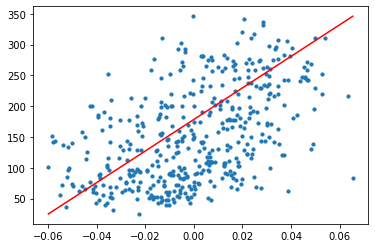

Loss =  198.2485542780681
R squared =  -5.627867143563222 
Adjusted R squared =  -5.781645963599491
Elapsed Time =  0.00010656899996774882


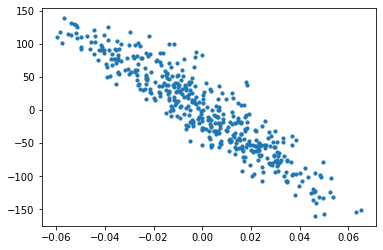

In [17]:

import timeit
from sklearn import datasets


diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target']

model = MyLinearRegression()
model.fit(X, y)
plt.scatter(X.mean(axis=1), y, s=10)
plt.plot([min(X.mean(axis=1)), max(X.mean(axis=1))], [min(y), max(y)], color='red') # linea di regressione
plt.show()
model.show_info()

y_predicted = model.predict(X)
y_predicted.size
plt.scatter(X.mean(axis=1), y_predicted, s=10)
